In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
# Load data

data = pd.read_csv('data/hotel_bookings.csv')

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# Replace nan in column agent and company with 0

data['agent'] = data['agent'].replace(np.nan,0)
data['company'] = data['company'].replace(np.nan,0)

# sum up children and babies in one column
data['children_all'] = data['children'] + data['babies']

# Drop rows where country and children is null
data.dropna(how='any', axis=0, inplace=True)

# replace negative and 0 adr with mean
mean_adr = data['adr'].mean().astype(int)
data['adr'] = data['adr'].apply(lambda x: mean_adr if x <= 0 else x)

# replace high adr >2000 with mean
mean_adr = data['adr'].mean().astype(int)
data['adr'] = data['adr'].apply(lambda x: mean_adr if x > 2000 else x)

# create date-time column
# data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str),format='%Y-%B-%d')

# Drop arrival_date_year, arrival_date_month, arrival_date_day_of_month
data.drop(['arrival_date_year',
           'arrival_date_month',
           'arrival_date_day_of_month',],axis=1, inplace=True)

# calculate duration of stay
data['duration_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# drop stays_in_weekend_nights and stays_in_week_nights
data.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1, inplace=True)

# drop reservation_status_date and reservation_status
data.drop(['reservation_status_date', 'reservation_status'],axis=1, inplace=True)

data.drop(['distribution_channel',
           'is_repeated_guest',
           'previous_cancellations',
           'previous_bookings_not_canceled',
           'assigned_room_type',
           'booking_changes',
           'company',
           'days_in_waiting_list',
           'customer_type'],axis=1, inplace=True)

# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data = data[~filter]

# reset index



In [6]:
data = data.reset_index().drop('index', axis=1)

In [7]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,adults,children,babies,meal,country,market_segment,reserved_room_type,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests,children_all,duration_of_stay
0,Resort Hotel,0,342,27,2,0.0,0,BB,PRT,Direct,C,No Deposit,0.0,102.0,0,0,0.0,0
1,Resort Hotel,0,737,27,2,0.0,0,BB,PRT,Direct,C,No Deposit,0.0,102.0,0,0,0.0,0
2,Resort Hotel,0,7,27,1,0.0,0,BB,GBR,Direct,A,No Deposit,0.0,75.0,0,0,0.0,1
3,Resort Hotel,0,13,27,1,0.0,0,BB,GBR,Corporate,A,No Deposit,304.0,75.0,0,0,0.0,1
4,Resort Hotel,0,14,27,2,0.0,0,BB,GBR,Online TA,A,No Deposit,240.0,98.0,0,1,0.0,2


In [8]:
# get categorical columns

cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [9]:
cat_df = data[cat_cols]

In [10]:
cat_df

,hotel,meal,country,market_segment,reserved_room_type,deposit_type
0,Resort Hotel,BB,PRT,Direct,C,No Deposit
1,Resort Hotel,BB,PRT,Direct,C,No Deposit
2,Resort Hotel,BB,GBR,Direct,A,No Deposit
3,Resort Hotel,BB,GBR,Corporate,A,No Deposit
4,Resort Hotel,BB,GBR,Online TA,A,No Deposit
...,...,...,...,...,...,...
118723,City Hotel,BB,BEL,Offline TA/TO,A,No Deposit
118724,City Hotel,BB,FRA,Online TA,E,No Deposit
118725,City Hotel,BB,DEU,Online TA,D,No Deposit
118726,City Hotel,BB,GBR,Online TA,A,No Deposit


In [11]:
# Apply a label encoder for categorical values

from sklearn.preprocessing import LabelEncoder
le_hotel = LabelEncoder()
cat_df['hotel'] = le_hotel.fit_transform(cat_df['hotel'])

le_meal = LabelEncoder()
cat_df['meal'] = le_meal.fit_transform(cat_df['meal'])

le_country = LabelEncoder()
cat_df['country'] = le_country.fit_transform(cat_df['country'])

le_market = LabelEncoder()
cat_df['market_segment'] = le_market.fit_transform(cat_df['market_segment'])

le_room = LabelEncoder()
cat_df['reserved_room_type'] = le_room.fit_transform(cat_df['reserved_room_type'])

le_deposit = LabelEncoder()
cat_df['deposit_type'] = le_deposit.fit_transform(cat_df['deposit_type'])

/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_31566/1107663036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel'] = le_hotel.fit_transform(cat_df['hotel'])
/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_31566/1107663036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['meal'] = le_meal.fit_transform(cat_df['meal'])
/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_31566/1107663036.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

In [12]:
num_df = data.drop(columns= cat_cols, axis =1 )
num_df.drop('is_canceled', axis=1, inplace=True)

In [13]:
num_df

,lead_time,arrival_date_week_number,adults,children,babies,agent,adr,required_car_parking_spaces,total_of_special_requests,children_all,duration_of_stay
0,342,27,2,0.0,0,0.0,102.00,0,0,0.0,0
1,737,27,2,0.0,0,0.0,102.00,0,0,0.0,0
2,7,27,1,0.0,0,0.0,75.00,0,0,0.0,1
3,13,27,1,0.0,0,304.0,75.00,0,0,0.0,1
4,14,27,2,0.0,0,240.0,98.00,0,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
118723,23,35,2,0.0,0,394.0,96.14,0,0,0.0,7
118724,102,35,3,0.0,0,9.0,225.43,0,2,0.0,7
118725,34,35,2,0.0,0,9.0,157.71,0,4,0.0,7
118726,109,35,2,0.0,0,89.0,104.40,0,0,0.0,7


## Define Features and Target

In [14]:
# Separate features and target

X = pd.concat([cat_df, num_df], axis=1)
y = data['is_canceled']

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Normalize features
X_scaled = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix
rfc = RandomForestClassifier(n_estimators=100) # number of trees = 100
rfc.fit(X_train, y_train)

# Prediction
prediction_rfc = rfc.predict(X_test)

# Evaluate the model

acc_rfc = accuracy_score(y_test, prediction_rfc)

print(f"Accuracy score of Random Forest Classifier is {acc_rfc}")
print(classification_report(y_test, prediction_rfc))
print(confusion_matrix(y_test, prediction_rfc))


Accuracy score of Random Forest Classifier is 0.8782391420309386
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     22300
           1       0.86      0.80      0.83     13319

    accuracy                           0.88     35619
   macro avg       0.87      0.86      0.87     35619
weighted avg       0.88      0.88      0.88     35619

[[20567  1733]
 [ 2604 10715]]


Text(0.5, 25.722222222222214, 'Predicted Values')

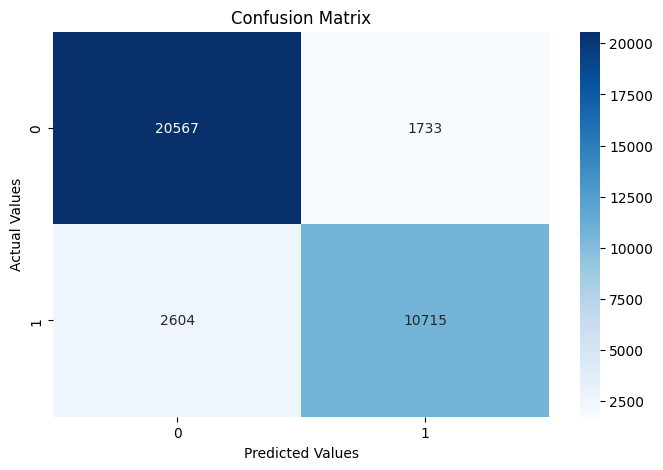

In [18]:
cm=confusion_matrix(y_test,prediction_rfc)
plt.figure(figsize=(8,5))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

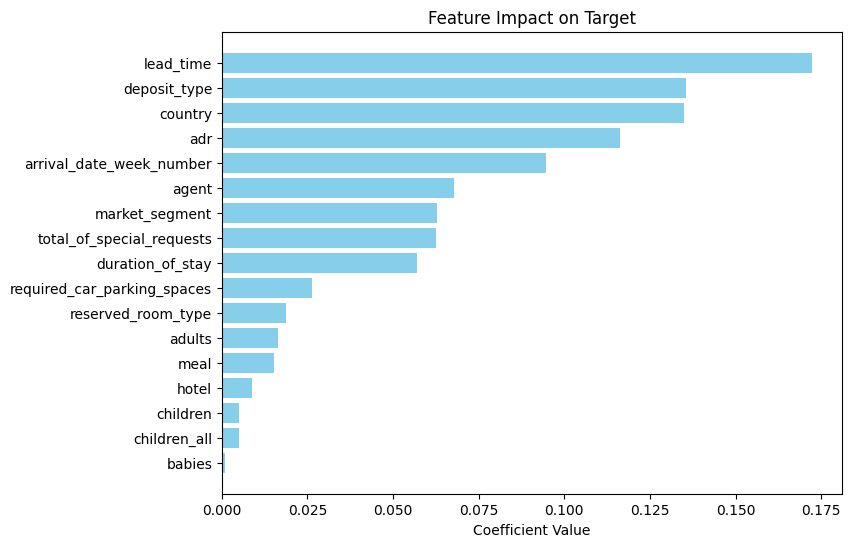

In [19]:
# Retrieve and interpret features

coeff_rfc = rfc.feature_importances_

# Map coefficients to feature names

features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeff_rfc})

# Sort coefficient by absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Target')
plt.gca().invert_yaxis()  # Highest impact on top
plt.show()

In [20]:
coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient')

In [21]:
X.head(40)

,hotel,meal,country,market_segment,reserved_room_type,deposit_type,lead_time,arrival_date_week_number,adults,children,babies,agent,adr,required_car_parking_spaces,total_of_special_requests,children_all,duration_of_stay
0,1,0,135,3,2,0,342,27,2,0.0,0,0.0,102.00,0,0,0.0,0
1,1,0,135,3,2,0,737,27,2,0.0,0,0.0,102.00,0,0,0.0,0
2,1,0,59,3,0,0,7,27,1,0.0,0,0.0,75.00,0,0,0.0,1
3,1,0,59,2,0,0,13,27,1,0.0,0,304.0,75.00,0,0,0.0,1
4,1,0,59,6,0,0,14,27,2,0.0,0,240.0,98.00,0,1,0.0,2
5,1,0,59,6,0,0,14,27,2,0.0,0,240.0,98.00,0,1,0.0,2
6,1,0,135,3,2,0,0,27,2,0.0,0,0.0,107.00,0,0,0.0,2
7,1,1,135,3,2,0,9,27,2,0.0,0,303.0,103.00,0,1,0.0,2
8,1,0,135,6,0,0,85,27,2,0.0,0,240.0,82.00,0,1,0.0,3
9,1,2,135,5,3,0,75,27,2,0.0,0,15.0,105.50,0,0,0.0,3


In [22]:
# Test prediction based on single values

predicted_label = []
true_label = []
for i in range(0,100):
    test_df=pd.DataFrame(columns=X.columns, data=[X.loc[i]])
    test_scaled = scaler.transform(test_df)
    predicted_label.append(rfc.predict(test_scaled))
    true_label.append(y.loc[i])

In [23]:
accuracy_score(true_label,predicted_label)

0.97

In [24]:
print(classification_report(true_label,predicted_label))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        77
           1       0.92      0.96      0.94        23

    accuracy                           0.97       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.97      0.97      0.97       100



In [25]:
data.head(100)['is_canceled'].value_counts()

is_canceled
0    77
1    23
Name: count, dtype: int64

In [26]:
X.columns

Index(['hotel', 'meal', 'country', 'market_segment', 'reserved_room_type',
       'deposit_type', 'lead_time', 'arrival_date_week_number', 'adults',
       'children', 'babies', 'agent', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'children_all', 'duration_of_stay'],
      dtype='object')

In [27]:
print(list(X.iloc[0]))

[1.0, 0.0, 135.0, 3.0, 2.0, 0.0, 342.0, 27.0, 2.0, 0.0, 0.0, 0.0, 102.0, 0.0, 0.0, 0.0, 0.0]


## Save ML model, LabelEncoder and Scaler

In [28]:
import pickle

# save the labelEncoder
with open('.streamlit/model_cancel/label_hotel.pkl', 'wb') as f:
  pickle.dump(le_hotel, f)

with open('.streamlit/model_cancel/label_meal.pkl', 'wb') as f:
  pickle.dump(le_meal, f)

with open('.streamlit/model_cancel/label_country.pkl', 'wb') as f:
  pickle.dump(le_country, f)

with open('.streamlit/model_cancel/label_market.pkl', 'wb') as f:
  pickle.dump(le_market, f)

with open('.streamlit/model_cancel/label_room.pkl', 'wb') as f:
  pickle.dump(le_room, f)

with open('.streamlit/model_cancel/label_deposit.pkl', 'wb') as f:
  pickle.dump(le_deposit, f)
  
#save the scaler
with open('.streamlit/model_cancel/scaler_cancel.pkl', 'wb') as f:
  pickle.dump(scaler, f)

#save the model
with open('.streamlit/model_cancel/ML_cancel.pkl', 'wb') as f:
  pickle.dump(rfc, f)